In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

# What's Going To Bite You in Louisville?

## Data

Description from [Kaggle](https://www.kaggle.com/rtatman/animal-bites): 

> ### Context:
> In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.
>
> ### Content:
> Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.
> - bite_date: The date the bite occurred
> - SpeciesIDDesc: The species of animal that did the biting
> - BreedIDDesc: Breed (if known)
> - GenderIDDesc: Gender (of the animal)
> - color: color of the animal
> - vaccination_yrs: how many years had passed since the last vaccination
> - vaccination_date: the date of the last vaccination
> - victim_zip: the zipcode of the victim
> - AdvIssuedYNDesc: whether advice was issued
> - WhereBittenIDDesc: Where on the body the victim was bitten
> - quarantine_date: whether the animal was quarantined
> - DispositionIDDesc: whether the animal was released from quarantine
> - headsentdate: the date the animal’s head was sent to the lab
> - release_date: the date the animal was released
> - ResultsIDDesc: results from lab tests (for rabies)

In [2]:
df = pd.read_csv('Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


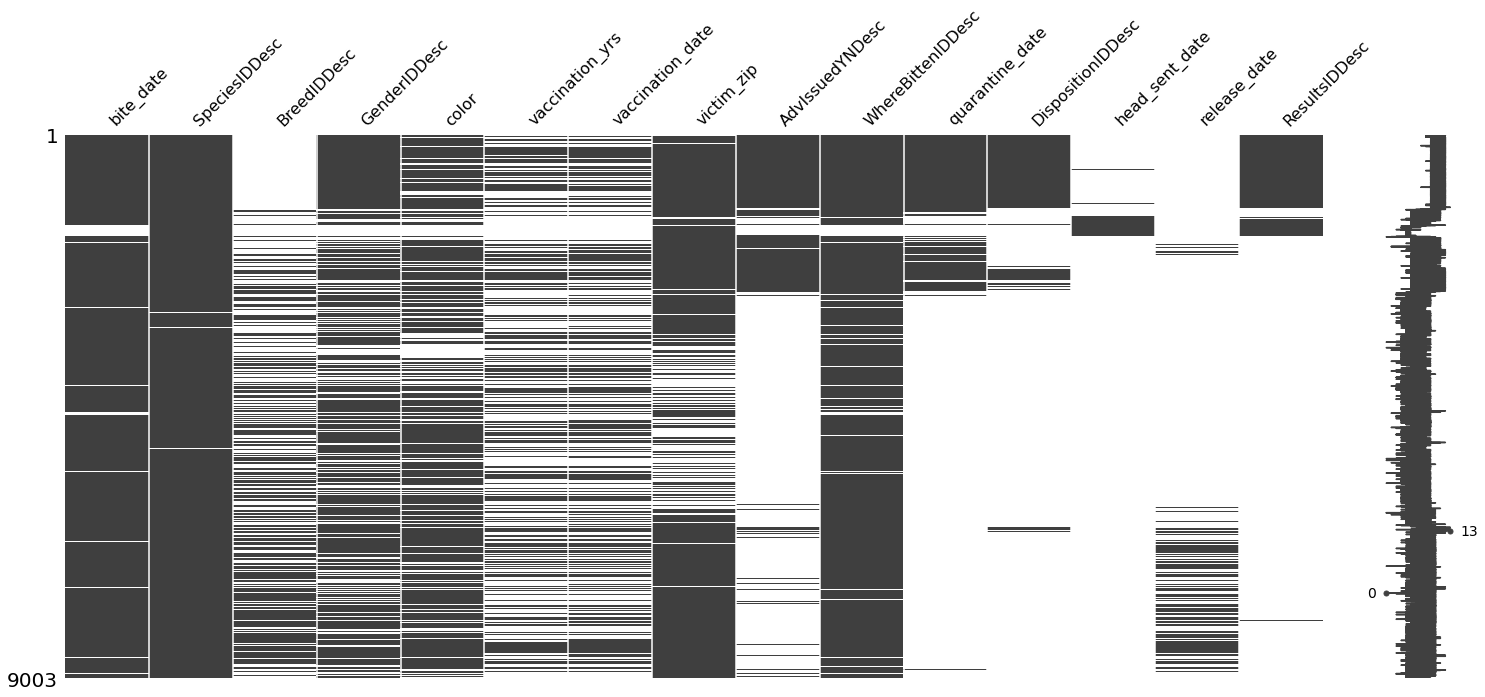

In [4]:
msno.matrix(df);

## Hypothesis

The data can be used to determine what is likely to bite you, if you are a resident of Louisville.

## What's Biting People?

Divide total rows by the population of Louisville to get the probability of getting bit in Louivile:

In [5]:
num_bites = 9003
pop_lou = 617638
prob_bit = num_bites / pop_lou

print(f"If you are a resident of Louisville, you have a {prob_bit*100:.2f}% chance of getting bit.")

If you are a resident of Louisville, you have a 1.46% chance of getting bit.


In [6]:
df.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

In [7]:
print(df.SpeciesIDDesc.unique())

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' nan 'HORSE' 'SKUNK' 'FERRET']


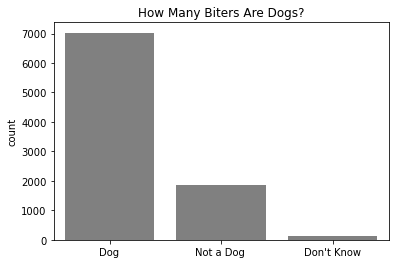

In [8]:
df['SpeciesIDDesc'] = df['SpeciesIDDesc'].fillna('NaN');

def is_dog(row):
    if row['SpeciesIDDesc'] == 'NaN':
        val = 'Don\'t Know'
    elif row['SpeciesIDDesc'] == 'DOG':
        val = 'Dog'
    else:
        val = 'Not a Dog '
    return val

df['is_a_dog'] = df.apply(is_dog, axis=1)

_ = sns.countplot(x='is_a_dog', data=df, color  = "gray")
_ = plt.xlabel("")
_ = plt.title("How Many Biters Are Dogs?")

plt.show()

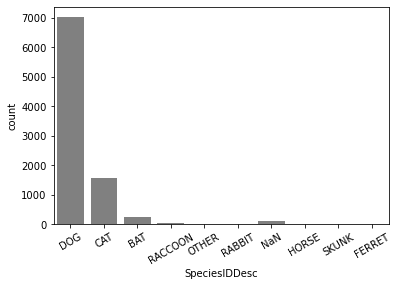

In [10]:
#_ = plt.figure(figsize=(3,2))
_ = plt.xticks(rotation=30)
_ = sns.countplot(x=df.SpeciesIDDesc, color  = "gray")

In [9]:
species_counts = df['SpeciesIDDesc'].value_counts()
print(species_counts)

DOG        7029
CAT        1568
BAT         237
NaN         118
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64


In [11]:
num_dog_bites = species_counts['DOG'] / pop_lou
print(f"If you are a resident of Louisville, you have a {num_dog_bites*100:.2}% chance of getting bit by a dog.")

If you are a resident of Louisville, you have a 1.1% chance of getting bit by a dog.


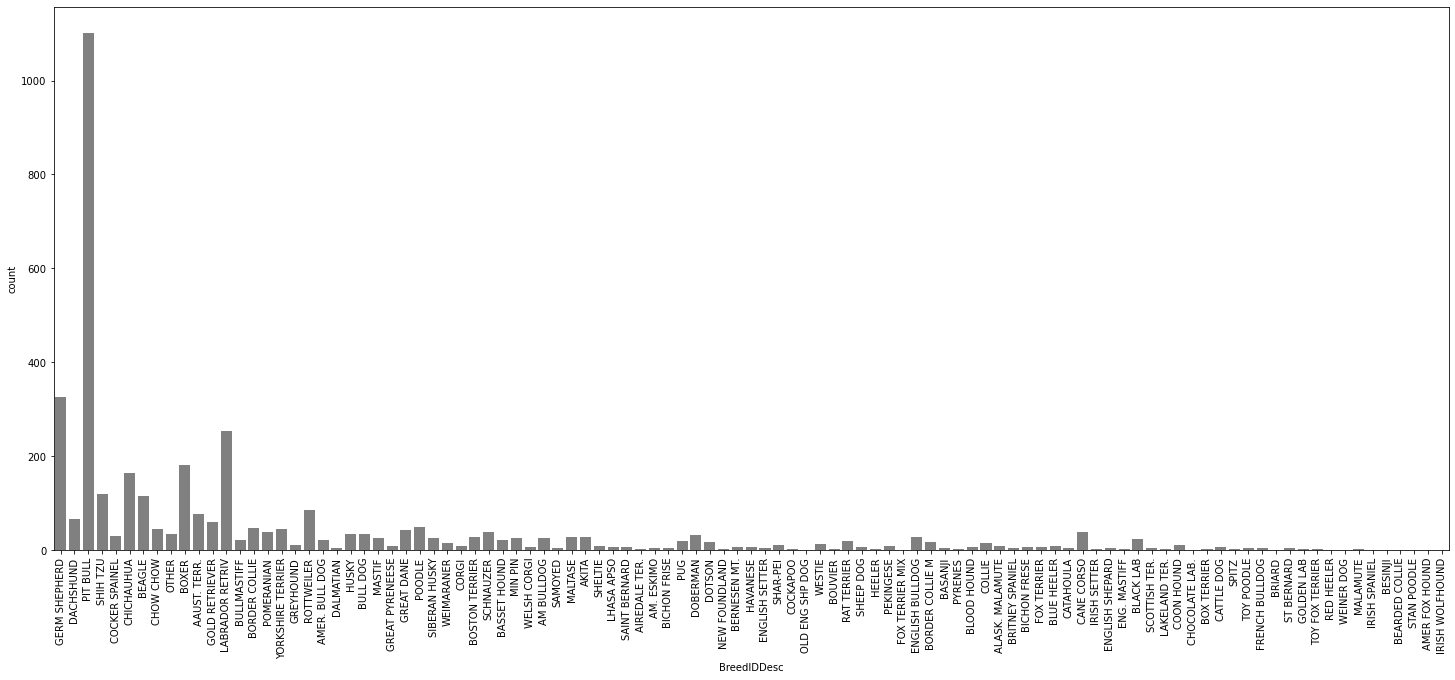

In [12]:
_ = plt.figure(figsize=(25,10))
_ = sns.countplot(x='BreedIDDesc', data=df, color = "gray")
_ = plt.xticks(rotation=90)
plt.show()

In [15]:
breed_counts = df.BreedIDDesc.value_counts()
print(breed_counts.sort_values(ascending=False).head(10))

PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
SHIH TZU            119
BEAGLE              116
ROTTWEILER           86
AAUST. TERR.         78
DACHSHUND            67
Name: BreedIDDesc, dtype: int64


In [16]:
num_pitbull_bites = breed_counts['PIT BULL'] / pop_lou
print(f"If you are a resident of Louisville, you have a {num_pitbull_bites*100:.2}% chance of getting bit by a pit bull.")

If you are a resident of Louisville, you have a 0.18% chance of getting bit by a pit bull.


## Where Are People Getting Bit?

In [17]:
print(df.WhereBittenIDDesc.unique())

['BODY' 'HEAD' nan 'UNKNOWN']


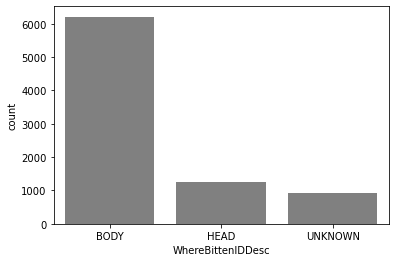

In [18]:
sns.countplot(x = df.WhereBittenIDDesc, color  = "gray");

## When Are People Getting Bit?

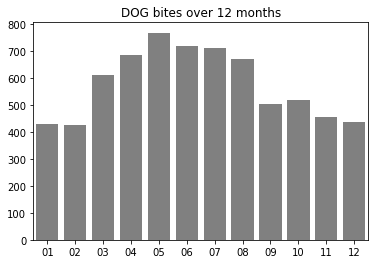

In [19]:
# code adpated from: https://www.kaggle.com/sundarkumaran/kernel68a531266b

def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = df.loc[(df['SpeciesIDDesc']==animal)&(df['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal, color  = "gray")
    plt.title(animal + ' bites over 12 months')

animal_month('DOG',df)

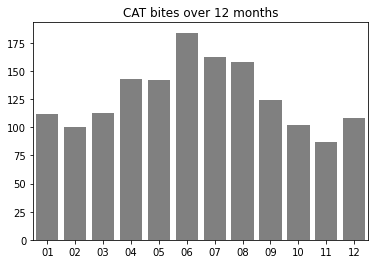

In [20]:
animal_month('CAT',df)

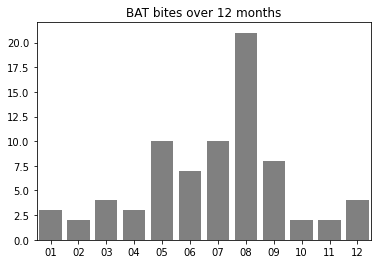

In [21]:
animal_month('BAT',df)

## Conclusion

In Louisville, you are most likely to get bit by a dog. Pit bulls are the highest frequency biting breed, but you are equally or more likely to get bit by some other breed of dog (or some other animal, on the head, like a bat).

Most bites occur over the warmer months, but there is a small spike in cat bites in December and January. Why?